In [1]:
import numpy as np

from bqskit import Circuit, compile
from bqskit.ir.gates import CPGate, CSGate, CTGate, SwapGate
from bqskit.ext import bqskit_to_qiskit

import qiskit
from qiskit import QuantumCircuit, QuantumRegister

from qiskit.transpiler import CouplingMap, PassManager
from qiskit.transpiler.passes import BasicSwap

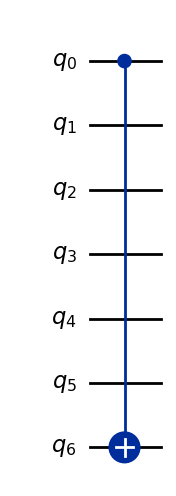

In [11]:
circ = QuantumCircuit(7)

circ.cx(0, 6)
# circ.swap(0, 4)
# circ.ccx(0, 2, 4)

circ.draw(output='mpl')

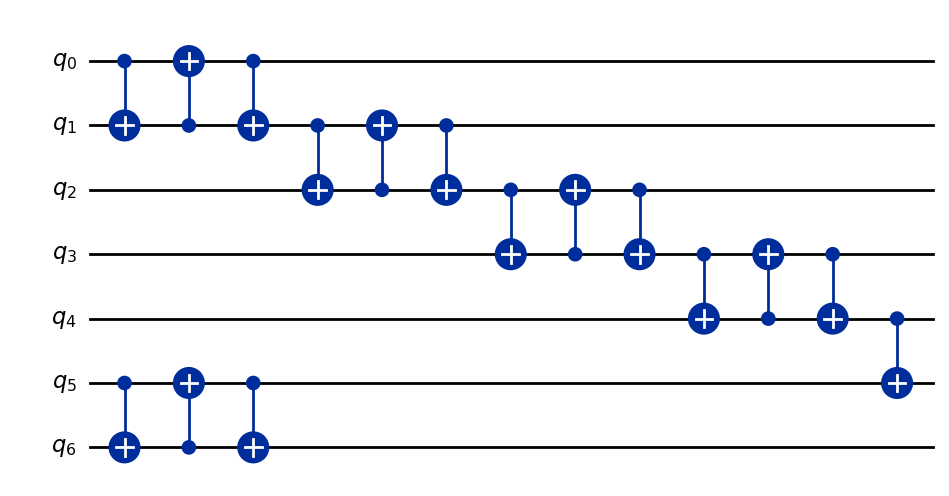

In [12]:
coupling_map = CouplingMap([[0,1], [1,2], [2,3], [3,4], [4,5], [5,6]])
# basic_swap_pass = BasicSwap(coupling_map)
# pm = PassManager(basic_swap_pass)
# tc = pm.run(tc)

tc = qiskit.transpile(circ, initial_layout=[0,1,2,3,4,5,6], coupling_map=coupling_map) # , optimization_level=3)
tc = tc.decompose()
tc.draw(output='mpl')

In [8]:
from bqskit import MachineModel
from bqskit.ir.gates import CCXGate

num_qubits = 3
coupling_map = CouplingMap([[0,1], [1,2]]) #, [2,3], [3,4]])

mm = MachineModel(num_qubits, coupling_graph = coupling_map)

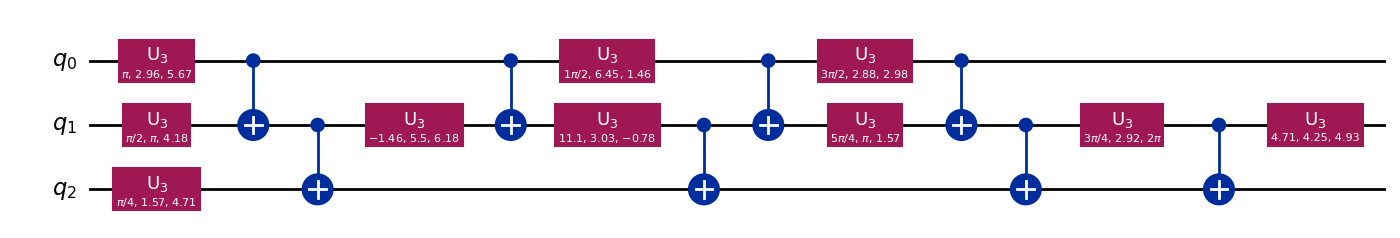

In [10]:
bc = Circuit(3)
bc.append_gate(CCXGate(), (0, 1, 2))
cc = compile(bc, model=mm, optimization_level=2)
qc = bqskit_to_qiskit(cc)
qc.draw(output='mpl')